## Final Project Submission

Please fill out:
* Student name: Mika Wambua Benson
* Student pace: part-time
* Scheduled project review date/time: 23/12/2024
* Instructor name: Samuel Karu
* Blog post URL: 


### Introduction

Welcome to the year 2912, where your data science skills are needed to solve a cosmic mystery. We've received a transmission from four lightyears away and things aren't looking good.

The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

![image.png](attachment:6c01ff50-6b3b-4194-9d73-65a619c4465e.png)

### Problem Statement
While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!

To help rescue crews and retrieve the lost passengers, you are challenged to predict which passengers were transported by the anomaly using records recovered from the spaceship’s damaged computer system.

Help save them and change history!


### Objectives
1. Which HomePlanet had the highest Transportation rate for its passengers.

2. Check whether the passenger being on CryoSleep contributed to the passengers being transported.

3. Examine the trends for the passengers age that were transported to the another dimension. 

4. Develop the best machine learning algorith that predicts whether the passengers were transported or not.

### Data 
The dataset was extracted from :https://www.kaggle.com/competitions/st-2-ml-bootcamp/code


## Importing necessary libraries

In [236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.compose import ColumnTransformer

import warnings
warnings.filterwarnings("ignore")

### Loading the files

In [150]:
data_s = pd.read_csv("sample_submission.csv")
data = pd.read_csv("train.csv")
data_t = pd.read_csv("test.csv")

In [199]:
# check the first few rows for the train csv file
data.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


## Data Understanding

* train.csv - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.

* PassengerId - A unique Id for each passenger. Each Id takes the form 0001_01 where 0001 indicates a group the passenger is travelling with and 01 is their number within the group. People in a group are often family members, but not always.

* HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.

* CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

* Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

* Destination - The planet the passenger will be debarking to.

* Age - The age of the passenger.

* VIP - Whether the passenger has paid for special VIP service during the voyage.

* RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

* Name - The first and last names of the passenger.

* Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

* test.csv - Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. Your task is to predict the value of Transported for the passengers in this set.

* sample_submission.csv - A submission file in the correct format.

* PassengerId - Id for each passenger in the test set.

* Transported - The target. For each passenger, predict either True or False.

In [151]:
print(data.shape)

(8693, 14)


In [152]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [153]:
# select the columns to work with
selected_columns = data.drop(columns = ['PassengerId', 'Name', 'Cabin'])
selected_columns.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


## Data Preparation

In [154]:
# create a copy before cleaning 
data = selected_columns.copy()
data.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [202]:
# Drop the duplicates values in the dataset
data = data.drop_duplicates()
data.duplicated().sum()

0

In [203]:
# check the number of rows and column
data.shape

(6427, 11)

## Handle missing values

In [205]:
# create a copy before cleaning the dataset.
clean_data = data.copy()
data_1 = clean_data

In [206]:
data_1.isna().sum().sort_values(ascending = False)

CryoSleep       208
ShoppingMall    199
VIP             191
HomePlanet      186
Spa             182
VRDeck          182
Destination     178
RoomService     178
FoodCourt       175
Age             120
Transported       0
dtype: int64

In [207]:
# Handle the rows with missing values for the categorical columns.
check_columns = ['CryoSleep', 'VIP', 'HomePlanet', 'Destination']
data_1 = data_1.dropna(subset = check_columns)


In [208]:
# handle the missing values in continous variables
data_1['Age'] = data_1['Age'].fillna(data_1['Age'].median())
data_1['RoomService'] = data_1['RoomService'].fillna(0)
data_1['VRDeck'] = data_1['VRDeck'].fillna(0)
data_1['Spa'] = data_1['Spa'].fillna(data_1['Spa'].median())
data_1['FoodCourt'] = data_1['FoodCourt'].fillna(0)
data_1['ShoppingMall'] = data_1['ShoppingMall'].fillna(data_1['ShoppingMall'].median())


In [209]:
data_1.shape

(5687, 11)

In [210]:
data_1.isna().sum().sort_values(ascending = False)

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

In [211]:
data_1.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [215]:
# Analysis for the planet that had the highest percentage being transported
planet_transported = data_1.groupby("HomePlanet")["Transported"].mean().sort_values(ascending = False)
print(planet_transported)

# The passengers from Europa have the highest transportation rate with approximately 49.2% of them being transported.
# The passengers from Mars have a moderate transportation rate with roughly 34.5 % of them being transported.
# Roughly about 34.2% of passengers from homeplanet Earth might have been transported

HomePlanet
Europa    0.492123
Mars      0.345217
Earth     0.342072
Name: Transported, dtype: float64


<Axes: xlabel='HomePlanet', ylabel='Count'>

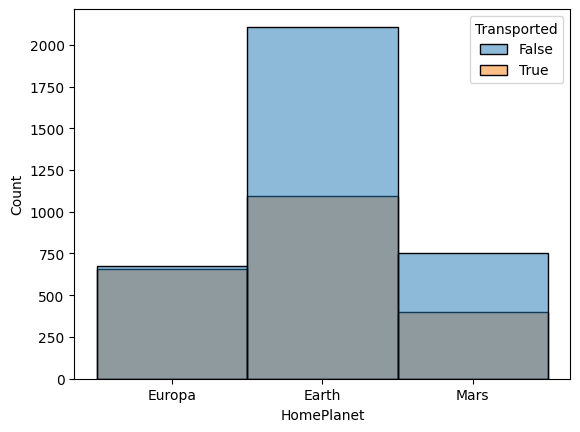

In [168]:
sns.histplot(data_1, hue = "Transported",x = "HomePlanet" )

In [217]:
# Check whether being placed on cryosleep contributed to being transported
cyosleep_outcome = data_1.groupby("CryoSleep")["Transported"].mean()
print(cyosleep_outcome)

# for the passengers not in CryoSleep (false) they have a 31.0% chances of being transported to another dimension
# for the passengers in CryoSleep (true) they have a 74.5% chances of being transported to another dimension


CryoSleep
False    0.310366
True     0.745187
Name: Transported, dtype: float64


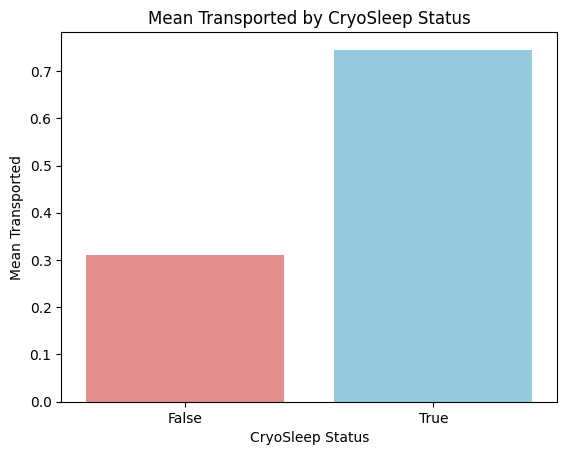

In [170]:
# Create a bar plot using seaborn
sns.barplot(x=cyosleep_outcome.index, y=cyosleep_outcome.values, palette=['lightcoral', 'skyblue'])

# Add titles and labels
plt.title('Mean Transported by CryoSleep Status')
plt.xlabel('CryoSleep Status')
plt.ylabel('Mean Transported')
plt.xticks(rotation=0)

# Show the plot
plt.show()

In [171]:
data_1["Destination"].value_counts()

Destination
TRAPPIST-1e      3995
55 Cancri e      1176
PSO J318.5-22     516
Name: count, dtype: int64

In [218]:
# Check the spending behavior for each passenger then group the data by Transported to calculate the mean cost for spending
data_1["Spending_cost"] = data_1[["RoomService", "VRDeck", "ShoppingMall", "Spa", "FoodCourt"]].sum(axis = 1)
spending_analysis = data_1.groupby("Transported")["Spending_cost"].mean().sort_values(ascending = False)
print(spending_analysis)

# On average the passengers who were not transported spent more (2242.011588) on average compared to those who were 
# transported who spent (1674.788739)


Transported
False    2242.011588
True     1674.788739
Name: Spending_cost, dtype: float64


In [219]:
data_1.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Spending_cost
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0.0
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,736.0
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,10383.0
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,5176.0
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,1091.0


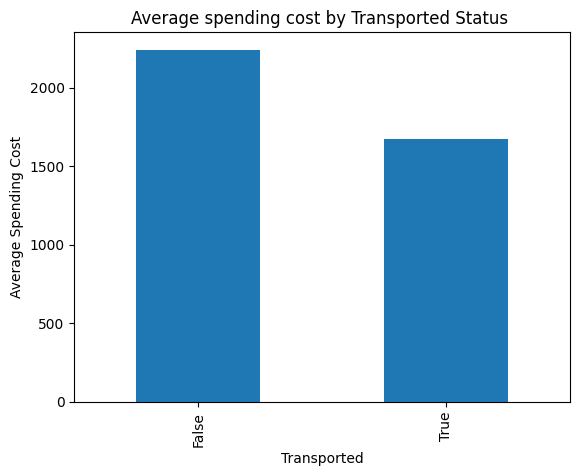

In [220]:
# Visualize the data
spending_analysis.plot(kind = "bar", title = "Average spending cost by Transported Status ")
plt.xlabel('Transported')
plt.ylabel('Average Spending Cost')
plt.show()

In [221]:
# Get the trends for the passengers age that were transported to the another dimension 
data_1['AgeGroup'] = pd.cut(data_1['Age'], bins=[15, 25, 35, 55, 80], labels=['Teenagers', 'Young Adult', 'Middle Aged', 'Senior'])
age_effect = data_1.groupby('AgeGroup')['Transported'].mean()
print(age_effect)

# for Teenagers passengers approximately 34.8% for that age_group were transported 
# for Adult passengers approximately 34.7% for that age_group were transported 
# for Middle Aged passengers around 38.4% for that age_group were transported 
# for Senior passengers approximately 44.0% for that age_group were transported 

AgeGroup
Teenagers      0.348023
Young Adult    0.347771
Middle Aged    0.384262
Senior         0.440476
Name: Transported, dtype: float64


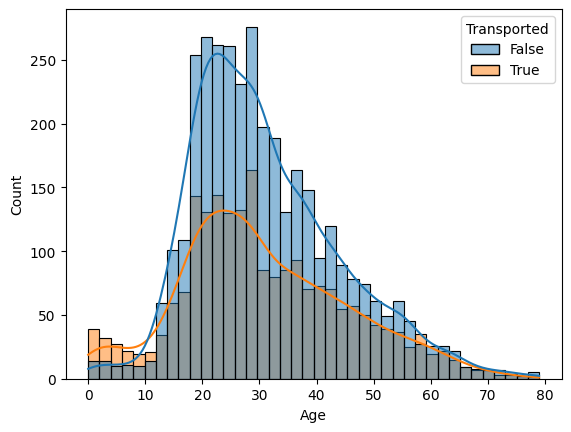

In [222]:
# visualize the Age of the passengers and the transportation rate.
sns.histplot(data_1, x = "Age", hue = "Transported", kde = True);

## Data Preprocessing

In [180]:
# select the categorical variables
catagoricals = data_1.select_dtypes(include = "object")
catagoricals.head()

,HomePlanet,CryoSleep,Destination,VIP
0,Europa,False,TRAPPIST-1e,False
1,Earth,False,TRAPPIST-1e,False
2,Europa,False,TRAPPIST-1e,True
3,Europa,False,TRAPPIST-1e,False
4,Earth,False,TRAPPIST-1e,False


In [181]:
# select the continous variables
continous = data_1.select_dtypes(include = "number")
continous.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Spending_cost
0,39.0,0.0,0.0,0.0,0.0,0.0,0.0
1,24.0,109.0,9.0,25.0,549.0,44.0,736.0
2,58.0,43.0,3576.0,0.0,6715.0,49.0,10383.0
3,33.0,0.0,1283.0,371.0,3329.0,193.0,5176.0
4,16.0,303.0,70.0,151.0,565.0,2.0,1091.0


In [223]:
data_1.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported',
       'Spending_cost', 'AgeGroup'],
      dtype='object')

In [224]:
# select the columns for preprocessing step
columns = ['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported']

data_2 = data_1[columns]
data_2.head()

,HomePlanet,CryoSleep,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,TRAPPIST-1e,24.0,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,TRAPPIST-1e,58.0,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,TRAPPIST-1e,33.0,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,TRAPPIST-1e,16.0,303.0,70.0,151.0,565.0,2.0,True


In [229]:
# select the features and target
X = data_2.drop(columns = ["Transported"], axis = 1)
y = data_2["Transported"]

# Preprocessing the data for both categorical and numerical features
cat_features = ['HomePlanet', 'CryoSleep', 'Destination']
num_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# create a preprocessor for categorical and numerical columns
preprocessor = ColumnTransformer(transformers = [('num', StandardScaler(), num_features), 
                                                 ('cat', OneHotEncoder(), cat_features)])

# create a Logistic regression pipeline
baseline_model = Pipeline([('preprocessor', preprocessor), 
                     ('classifier', LogisticRegression())])

# split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)

# Train the Logistic Regression model
baseline_model.fit(X_train, y_train)

# get the predictions on the test set
y_pred = baseline_model.predict(X_test)


# Lets evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n",classification_report(y_test, y_pred))
# Approximately 79.35% of the predictions were made by the model are correct.

Accuracy: 0.7934973637961336
Classification Report:
               precision    recall  f1-score   support

       False       0.83      0.85      0.84       723
        True       0.73      0.69      0.71       415

    accuracy                           0.79      1138
   macro avg       0.78      0.77      0.77      1138
weighted avg       0.79      0.79      0.79      1138



[[618 105]
 [130 285]]


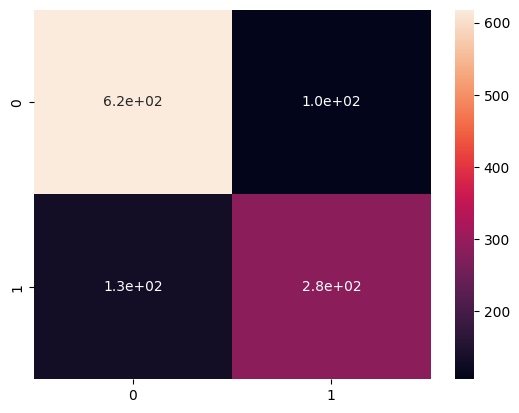

In [231]:
# plot the confusion matrix for the y_test
cfn = confusion_matrix(y_true = y_test, y_pred = y_pred)
print(cfn)
sns.heatmap(cfn, annot = True);

# The model correctly predicted  618 False instances
# The model predicted 105 instances as True but they are actually False
# The model predicted 130 instances as False but they were actually True
# The correctly predicted 285 True instances

0.8616207568864671


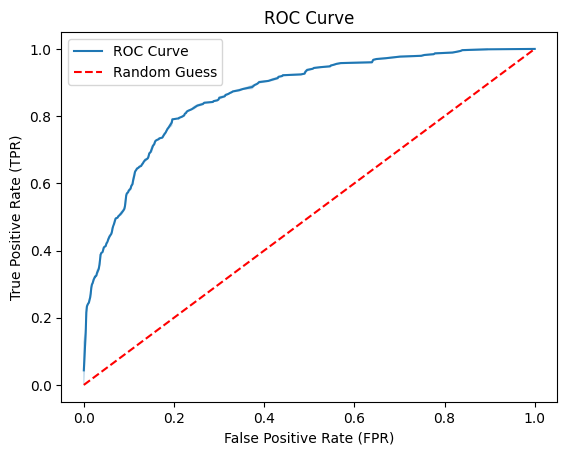

In [ ]:
# visualize the ROC curve for true positive rate against false negative rate
fpr, tpr,_ = roc_curve(y_true = y_test, y_score = baseline_model.decision_function(X_test))
area = auc(fpr, tpr)
print(area)
# The higher auc of 86.2% indicates a better model performance
sns.lineplot(x=fpr, y=tpr, label='ROC Curve')


# Add labels and title
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Guess')  # Diagonal line for random guessing
plt.legend()

# Show the plot
plt.show()

In [235]:
# improve the mode performance by setting some hyperparameters
# select the features and target
X = data_2.drop(columns = ["Transported"], axis = 1)
y = data_2["Transported"]

# Preprocessing the data for both categorical and numerical features
cat_features = ['HomePlanet', 'CryoSleep', 'Destination']
num_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# create a preprocessor for categorical and numerical columns
preprocessor = ColumnTransformer(transformers = [('num', StandardScaler(), num_features), 
                                                 ('cat', OneHotEncoder(), cat_features)])

# create a Logistic regression pipeline
baseline_model_1 = Pipeline([('preprocessor', preprocessor), 
                     ('classifier', LogisticRegression(fit_intercept = False, C = 1e12, solver = 'saga'))])

# split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)

# Train the Logistic Regression model
baseline_model_1.fit(X_train, y_train)

# get the predictions on the test set
y_pred = baseline_model_1.predict(X_test)


# Lets evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n",classification_report(y_test, y_pred))
# Approximately 79.35% of the predictions were made by the model are correct



Accuracy: 0.7952548330404218
Classification Report:
               precision    recall  f1-score   support

       False       0.83      0.85      0.84       723
        True       0.73      0.69      0.71       415

    accuracy                           0.80      1138
   macro avg       0.78      0.77      0.78      1138
weighted avg       0.79      0.80      0.79      1138



In [237]:
# Select the features and target
X = data_2.drop(columns=["Transported"], axis=1)
y = data_2["Transported"]

# Preprocessing the data for both categorical and numerical features
cat_features = ['HomePlanet', 'CryoSleep', 'Destination']
num_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Create a preprocessor for categorical and numerical columns
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), num_features), 
    ('cat', OneHotEncoder(), cat_features)
])

# Create a Logistic Regression pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor), 
    ('classifier', LogisticRegression(solver='saga'))
])

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100, 1e12],  # Regularization strength
    'classifier__fit_intercept': [True, False],  # Whether to fit the intercept
    'classifier__penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Regularization type
    'classifier__l1_ratio': [0, 0.5, 1]  # Only used when penalty is 'elasticnet'
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='accuracy')

# Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model using GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Evaluate the best model
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print("Test set accuracy: {:.2f}".format(accuracy))

# Get the predictions on the test set
y_pred = best_model.predict(X_test)

# Let's evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Best parameters found:  {'classifier__C': 0.01, 'classifier__fit_intercept': True, 'classifier__l1_ratio': 0, 'classifier__penalty': 'none'}
Test set accuracy: 0.80
Accuracy: 0.7952548330404218
Classification Report:
               precision    recall  f1-score   support

       False       0.83      0.85      0.84       723
        True       0.73      0.69      0.71       415

    accuracy                           0.80      1138
   macro avg       0.78      0.77      0.78      1138
weighted avg       0.79      0.80      0.79      1138



In [238]:
# check for class imbalance on the target variables
print("Raw Counts")
print(data_2["Transported"].value_counts())
print()
print("Percentages")
print(data_2["Transported"].value_counts(normalize=True))

# Take note of the class imbalanced for the passengers transported True and not transported False

Raw Counts
Transported
False    3538
True     2149
Name: count, dtype: int64

Percentages
Transported
False    0.622121
True     0.377879
Name: proportion, dtype: float64


<Axes: xlabel='Transported', ylabel='count'>

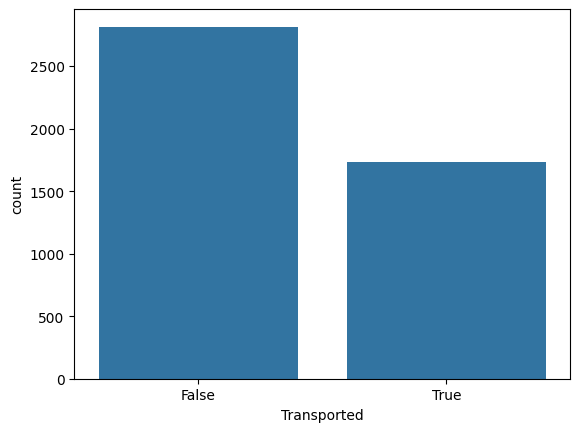

In [239]:
sns.countplot(x = y_train)


Class distribution after applying SMOTE:
Transported
False    3538
True     3538
Name: count, dtype: int64
0.8403337551609974

 Classification Report:
              precision    recall  f1-score   support

       False       0.77      0.75      0.76       890
        True       0.75      0.77      0.76       879

    accuracy                           0.76      1769
   macro avg       0.76      0.76      0.76      1769
weighted avg       0.76      0.76      0.76      1769


 Accuracy Score: 0.7597512719050311


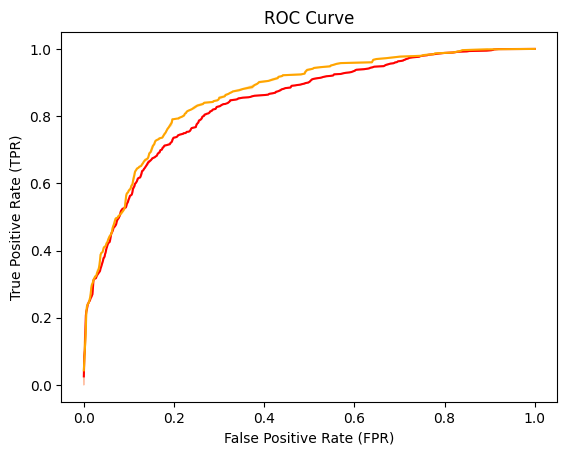

In [193]:
# create a two functions that perform smote analysis and logistic regression analysis

def smote_analysis(data_2):
    # Convert categorical columns to numerical using LabelEncoder
    label_encoders = {}
    for column in ['HomePlanet', 'CryoSleep', 'Destination']:
        le = LabelEncoder()
        data_2[column] = le.fit_transform(data_2[column].astype(str))
        label_encoders[column] = le

    # # Handle missing values by filling them
    # imputer = SimpleImputer(strategy='mean')
    # data_2[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa',  'VRDeck']] = imputer.fit_transform(
    #     data_2[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa',  'VRDeck']])

    # Separate features and target variable
    X = data_2.drop('Transported', axis=1)
    y = data_2['Transported']

    # Apply SMOTE
    smote = SMOTE()
    X_resampled, y_resampled = smote.fit_resample(X, y)

    # Convert resampled data back to DataFrame for better readability
    X_resampled = pd.DataFrame(X_resampled, columns=X.columns)
    y_resampled = pd.Series(y_resampled, name='Transported')

    # Combine resampled features and target into one DataFrame
    resampled_data = pd.concat([X_resampled, y_resampled], axis=1)

     # Print class distribution of the resampled target variable
    print('\nClass distribution after applying SMOTE:')
    print(y_resampled.value_counts())

    return X_resampled, y_resampled

# lets create second function that perform splitting on the resampled data then fit the model
def logistic_regression_analysis(data_2):
        
    # preprocess and resampled the data
    X_resampled, y_resampled = smote_analysis(data_2)
    
    # perform the train test split
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled)
    
    # fit then train the logistic regression model
    baseline_model = LogisticRegression(fit_intercept = False, C = 1e12, solver = "liblinear").fit(X_train, y_train)
    
    # get the predictions on the test data
    y_pred = baseline_model.predict(X_test)
    area_1 = auc(fpr, tpr)
    
    fpr1, tpr1,_ = roc_curve(y_true = y_test, y_score = baseline_model.decision_function(X_test))
    area1 = auc(fpr1, tpr1)
    print(area1)
    sns.lineplot(x = fpr1, y = tpr1, color = "red") 
    sns.lineplot(x = fpr, y = tpr, color = "orange")
    # Add labels and title
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('ROC Curve')
    
    # Evaluate the model performance
    print("\n Classification Report:")
    print(classification_report(y_test, y_pred))
    print("\n Accuracy Score:", accuracy_score(y_test, y_pred))
    
# perform Logistic Regression analysis
logistic_regression_analysis(data_2)


In [194]:
data_2.to_csv("data_2.csv", index = False)
# Save the entire DataFrame to a CSV file


In [195]:
data_2.head()

,HomePlanet,CryoSleep,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,1,0,2,39.0,0.0,0.0,0.0,0.0,0.0,False
1,0,0,2,24.0,109.0,9.0,25.0,549.0,44.0,True
2,1,0,2,58.0,43.0,3576.0,0.0,6715.0,49.0,False
3,1,0,2,33.0,0.0,1283.0,371.0,3329.0,193.0,False
4,0,0,2,16.0,303.0,70.0,151.0,565.0,2.0,True


## Create a Decision Tree Regression Model

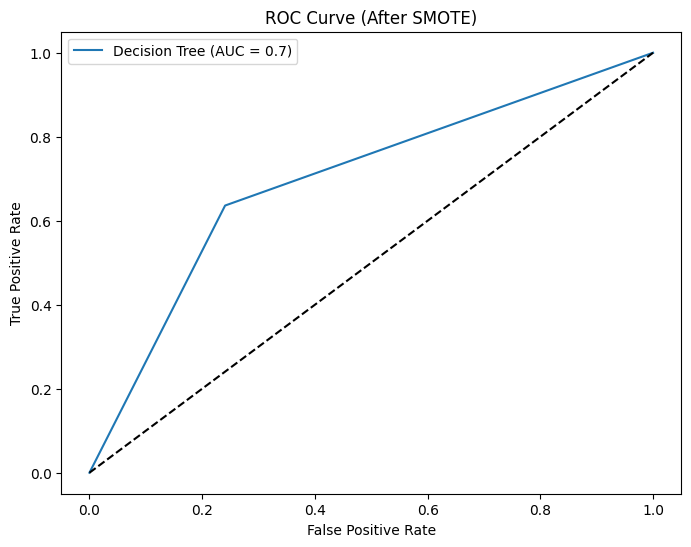

Accuracy: 0.7934973637961336
Classification Report:
               precision    recall  f1-score   support

       False       0.83      0.85      0.84       723
        True       0.73      0.69      0.71       415

    accuracy                           0.79      1138
   macro avg       0.78      0.77      0.77      1138
weighted avg       0.79      0.79      0.79      1138



In [196]:
# select the features and target
X = data_2.drop(columns = ["Transported"], axis = 1)
y = data_2["Transported"]

# Preprocessing the data for both categorical and numerical features
cat_features = ['HomePlanet', 'CryoSleep', 'Destination']
num_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# create a preprocessor for categorical and numerical columns
preprocessor = ColumnTransformer(transformers = [('num', StandardScaler(), num_features), 
                                                 ('cat', OneHotEncoder(), cat_features)])

# create a Logistic regression pipeline
pipeline = Pipeline([('preprocessor', preprocessor), 
                     ('classifier', LogisticRegression())])

# Create the pipeline with preprocessing and model
pipeline_1 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)

# Train the Logistic Regression model
pipeline_1.fit(X_train, y_train)

# get the predictions on the test set
y_pred_prob = pipeline_1.predict(X_test)

# ROC Curve
plt.figure(figsize=(8, 6))
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label='Decision Tree (AUC = ' + str(round(roc_auc_score(y_test, y_pred_prob), 2)) + ')')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (After SMOTE)')
plt.legend()
plt.show()

# Lets evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n",classification_report(y_test, y_pred))

### Conclusion

1. The passengers from Europa have the highest transportation rate with approximately 49.2% of them being transported from the 
   analysis.

2. For the Passengers in CryoSleep (true) they have a 74.5% chances of being transported to another dimension which suggests that
   passengers in Cryosleep were significantly more likely to be transported compared to those who 

3. From the analysis seems that the Elderly were transported more compared to the young teenagers 

4. 

In [197]:
# # ROC Curve
# plt.figure(figsize=(8, 6))
# fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
# plt.plot(fpr, tpr, label='Decision Tree (AUC = ' + str(round(roc_auc_score(y_test, y_pred_proba), 2)) + ')')
# plt.plot([0, 1], [0, 1], 'k--')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve (After SMOTE)')
# plt.legend()
# plt.show()

In [198]:
# fit the model 
# logreg_model = LogisticRegression().fit(X_train_final, y_train)